# Motion Capture Data Analysis - NM12

## Libraries
Installing and importing libraries for data processing, sound analysis and visualization. 

In [18]:
# Install a pip package in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} librosa

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - librosa

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [16]:
!{sys.executable} -m pip install chart_studio 

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=86beff4dc1fcc6efbdcc2114ce748430b367b2c345ad3e71a7ab1c1c2c9a4575
  Stored in directory: c:\users\bwils\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [9]:
!{sys.executable} -m pip install numba

In [10]:
import numba

In [66]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib
import random
%matplotlib inline
import csv
import glob
import os
import matplotlib.pyplot as plt
import math
import sys
import pylab
import numpy.linalg
import chart_studio





from scipy import stats
import seaborn
from IPython.display import display, Markdown


## Reading Motion Capture Data into Pandas Dataframes

In [19]:
#Reading QTOM generated tsv files (one for each group of participants) from local drive

nm12raw = {}

path = r'\Users\bwils\OneDrive\Documents\GitHub\Capstone-2--MicroMotion\Source_Data\Micro_Motion_2012\mocap_data' # use your path for the folder containing mocap files
nm_files = sorted(glob.glob(os.path.join(path, "*.tsv")))

i=1

for filename in nm_files:
    nm12raw[i] = pd.read_csv(filename, delimiter='\t', encoding='utf-8', skiprows=10, low_memory=False)
    nm12raw[i].drop(nm12raw[i].columns[len(nm12raw[i].columns)-1], axis=1, inplace=True)
    i = i+1



In [20]:
#Example: Group8. All participants. First correspond to the reference markers placed on static tripods
nm12raw[8]


,static X,static Y,static Z,s1 X,s1 Y,s1 Z,s2 X,s2 Y,s2 Z,s3 X,...,s9 Z,s10 X,s10 Y,s10 Z,s11 X,s11 Y,s11 Z,s12 X,s12 Y,s12 Z
0,1292.317,1031.940,1785.602,137.628,1746.671,1732.122,942.397,1780.328,1789.612,1759.089,...,1716.486,860.777,140.779,1728.157,1654.980,163.832,1671.018,2473.893,272.276,1754.657
1,1292.317,1031.943,1785.599,137.620,1746.712,1732.113,942.398,1780.313,1789.625,1759.114,...,1716.483,860.800,140.713,1728.165,1654.989,163.842,1671.021,2473.916,272.377,1754.641
2,1292.312,1031.945,1785.602,137.610,1746.759,1732.128,942.381,1780.294,1789.644,1759.124,...,1716.501,860.817,140.650,1728.170,1654.978,163.840,1671.017,2473.927,272.484,1754.631
3,1292.301,1031.950,1785.618,137.593,1746.834,1732.171,942.386,1780.261,1789.669,1759.150,...,1716.511,860.800,140.585,1728.164,1654.966,163.842,1671.014,2473.937,272.575,1754.634
4,1292.313,1031.944,1785.616,137.569,1746.871,1732.176,942.384,1780.206,1789.672,1759.189,...,1716.516,860.791,140.522,1728.178,1654.983,163.814,1671.029,2473.944,272.661,1754.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35896,1292.371,1031.934,1785.581,143.848,1772.845,1731.467,950.819,1807.949,1784.017,1743.552,...,1696.367,870.272,159.703,1727.583,1660.756,209.924,1664.916,2478.416,306.878,1744.099
35897,1292.349,1031.941,1785.581,143.790,1772.828,1731.485,950.869,1807.891,1784.040,1743.560,...,1696.374,870.212,159.762,1727.576,1660.743,209.946,1664.910,2478.418,306.890,1744.105
35898,1292.357,1031.933,1785.571,143.733,1772.767,1731.469,950.899,1807.852,1784.038,1743.602,...,1696.371,870.180,159.775,1727.572,1660.719,209.961,1664.917,2478.427,306.916,1744.116
35899,1292.352,1031.935,1785.578,143.680,1772.694,1731.491,950.947,1807.799,1784.035,1743.633,...,1696.363,870.158,159.788,1727.559,1660.707,209.978,1664.924,2478.442,306.931,1744.104


## Extracting individuals from groups and nesting in dictionaries

In [21]:
nm12 = {}
Fs = 100 #sampling frequency of the Mocap system during NM12 (fps)    
num_groups = len(nm12raw)
    

for g_id in range(1,num_groups+1):
    nm12[g_id] = {}
    j = 0
    k = 0
    for i in range (3,len(nm12raw[g_id].columns)+3,3):
        j = j+1
        nm12[g_id][j] = nm12raw[g_id].iloc[:,k:i:1]
        nm12[g_id][j].columns = ['X', 'Y', 'Z']
        time = np.linspace(0, len(nm12raw[g_id])/Fs, len(nm12raw[g_id]))
        nm12[g_id][j].insert(0, 'Time (s)', time)
        k = k+3

In [22]:
nm12[8][2] #data from group 8, marker 2 with time column

,Time (s),X,Y,Z
0,0.000000,137.628,1746.671,1732.122
1,0.010000,137.620,1746.712,1732.113
2,0.020001,137.610,1746.759,1732.128
3,0.030001,137.593,1746.834,1732.171
4,0.040001,137.569,1746.871,1732.176
...,...,...,...,...
35896,358.969999,143.848,1772.845,1731.467
35897,358.979999,143.790,1772.828,1731.485
35898,358.989999,143.733,1772.767,1731.469
35899,359.000000,143.680,1772.694,1731.491


## Calculating variables for analysis (displacement, velocity, quantity of motion)

### Calculating displacement (change of position)

In [23]:
def displacement(position):

    displacement = (
        np.roll(position, -1, axis=0)
        - position)
    displacement = displacement.drop(displacement.index[len(displacement)-1])
    
    displacement.index =  position['Time (s)'][1:]
    
    return displacement


In [24]:
displacements = {}    

for groups in range(1,num_groups+1):
    displacements[groups] = {}
    
    for i in range(1,len(nm12[groups]) + 1):
        displacements[groups][i] = displacement(nm12[groups][i])
        displacements[groups][i]['timestep (s)'] = displacements[groups][i]['Time (s)']
        displacements[groups][i] = displacements[groups][i].drop(['Time (s)'], axis=1)
        

In [25]:
displacements[8][2] #displacement for group 8, marker 2

,X,Y,Z,timestep (s)
Time (s),,,,
0.010000,-0.008,0.041,-0.009,0.01
0.020001,-0.010,0.047,0.015,0.01
0.030001,-0.017,0.075,0.043,0.01
0.040001,-0.024,0.037,0.005,0.01
0.050001,-0.002,0.060,0.002,0.01
...,...,...,...,...
358.969999,-0.068,0.000,0.015,0.01
358.979999,-0.058,-0.017,0.018,0.01
358.989999,-0.057,-0.061,-0.016,0.01


### Plotting displacement


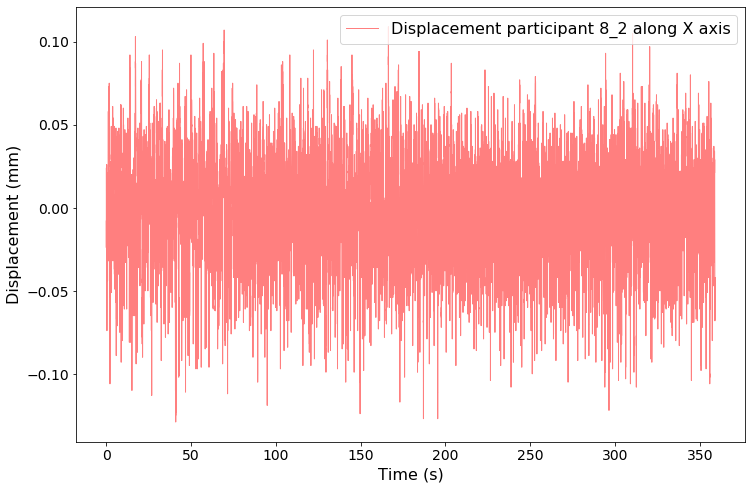

In [26]:
fig5, ax5 = plt.subplots(1)
fig5.set_figheight(8)
fig5.set_figwidth(12)
ax5.set_facecolor("white")
ax5.plot(displacements[8][2]['X'], lw=1, label='Displacement participant 8_2 along X axis', color='red', alpha=0.5) #Displacement on x axis

plt.tick_params(axis='both', which='major', labelsize=14)
ax5.legend(loc='upper right', fontsize=16)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('Displacement (mm)', fontsize=16);

### Calculating norm of displacement

In [27]:
def disp_norm(displacement):
  
       
    dispnorm = np.sqrt(
         displacement.X ** 2 +
         displacement.Y ** 2 +
         displacement.Z ** 2
    )
    
    return pd.DataFrame({
        'Norm of Displacement': dispnorm,
    })

In [28]:
disp_norms = {}    

for groups in range(1,num_groups+1):
    disp_norms[groups] = {}
    
    for i in range(1,len(nm12[groups])+1):
        disp_norms[groups][i] = disp_norm(displacements[groups][i])

In [29]:
disp_norms[8][2]

,Norm of Displacement
Time (s),
0.010000,0.042732
0.020001,0.050339
0.030001,0.088108
0.040001,0.044385
0.050001,0.060067
...,...
358.969999,0.069635
358.979999,0.063063
358.989999,0.085006


### Distance travelled
Cummulative distance travelled

In [30]:
#Concatenating norm of displacement for all participants in each group
disp_norms_group = {}
for group_id in range (1,num_groups+1):
    disp_norms_group[group_id] = pd.concat(disp_norms[group_id],1)
   
    

In [31]:
disp_norms_group[8]

,1,2,3,4,5,6,7,8,9,10,11
,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement
Time (s),,,,,,,,,,,
0.010000,0.004243,0.042732,0.019875,0.045717,0.026907,0.101912,0.054818,0.007810,0.070349,0.013784,0.104814
0.020001,0.006164,0.050339,0.031796,0.043278,0.012689,0.091285,0.057385,0.021726,0.065445,0.011874,0.108028
0.030001,0.020050,0.088108,0.041701,0.039812,0.027749,0.104293,0.067476,0.026000,0.067454,0.012530,0.091597
0.040001,0.013565,0.044385,0.055118,0.052412,0.017029,0.083144,0.034496,0.025100,0.065161,0.036028,0.086753
0.050001,0.013191,0.060067,0.060092,0.029950,0.051585,0.080610,0.025140,0.013964,0.078128,0.043428,0.084404
...,...,...,...,...,...,...,...,...,...,...,...
358.969999,0.021564,0.069635,0.025259,0.094340,0.071056,0.042767,0.043589,0.066098,0.037229,0.043012,0.032909
358.979999,0.023087,0.063063,0.079956,0.068622,0.052048,0.035623,0.054360,0.053460,0.084439,0.026249,0.013565


Text(0.5, 1.0, 'Distance travelled for all participants and reference markers, Group 8')

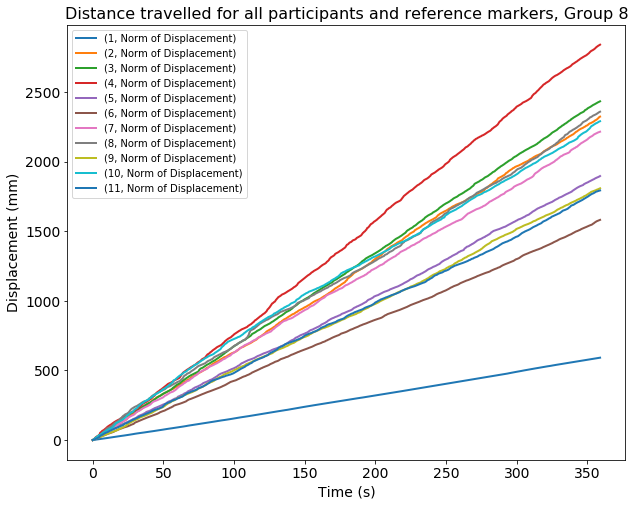

In [32]:
disp_norms_group[8].cumsum().plot(figsize=(10,8), linewidth=2, fontsize=14) #Indicate group number to plot
plt.xlabel('Time (s)', fontsize=14);
plt.ylabel('Displacement (mm)', fontsize=14);
plt.legend(loc='upper left', fontsize=10)
plt.title('Distance travelled for all participants and reference markers, Group 8', fontsize=16)

### Plotting the planar displacement

(array([1790., 1800., 1810., 1820., 1830., 1840., 1850., 1860.]),
 <a list of 8 Text yticklabel objects>)

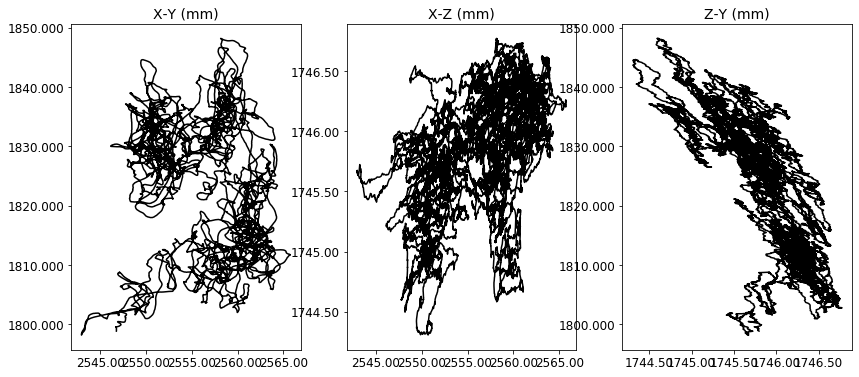

In [33]:
from matplotlib.ticker import FormatStrFormatter

fig = plt.figure(figsize=(14,6))
aa = plt.subplot(1, 3, 1)
plt.plot(nm12[1][5]['X'], nm12[1][5]['Y'], color='k') #XY plane participant 5, group 1
plt.title('X-Y (mm)', fontsize=14)
aa.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
aa.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ab = plt.subplot(1, 3, 2)
plt.plot(nm12[1][5]['X'], nm12[1][5]['Z'], color='k') #XZ plane participant 5, group 1
plt.title('X-Z (mm)', fontsize=14)
ab.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ab.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ac = plt.subplot(1, 3, 3)
plt.plot(nm12[1][5]['Z'], nm12[1][5]['Y'], color='k') #ZY plane participant 5, group 1
plt.title('Z-Y (mm)', fontsize=14)
ac.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ac.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


#fig.savefig("paths.pdf", bbox_inches='tight')

### Calculating velocity in X, Y, and Z directions
Defining and running functions to calculate velocity

In [34]:
def x_vel(displacement):
    
    #displacement = displacement.drop(displacement.index)
    
    vel = np.sqrt(
         displacement.X ** 2) /  displacement['timestep (s)']
    
    return pd.DataFrame({
        'Vel X': vel,
    })

In [35]:
def y_vel(displacement):
   
    #displacement = displacement.drop(displacement.index)
    
    vel = np.sqrt(
         displacement.Y ** 2) /  displacement['timestep (s)']
    
    return pd.DataFrame({
        'Vel Y': vel,
    })

In [36]:
def z_vel(displacement):
    
    #displacement = displacement.drop(displacement.index)
    
    vel = np.sqrt(
         displacement.Z ** 2) /  displacement['timestep (s)']
    
    return pd.DataFrame({
        'Vel Z': vel,
    })

In [37]:

velx = {} #anterior-posterior (AP)
vely = {} #mediolateral (ML)
velz = {} #vertical (SI)

for groups in range(1,num_groups+1):
    velx[groups] = {}
    vely[groups] = {}
    velz[groups] = {}
    
    for i in range(1,len(nm12[groups])+1):
        velx[groups][i] = x_vel(displacements[groups][i])
        vely[groups][i] = y_vel(displacements[groups][i])
        velz[groups][i] = z_vel(displacements[groups][i])

In [38]:
velx[8][2] #velocity in the AP direction for participant 8_2

,Vel X
Time (s),
0.010000,0.799978
0.020001,0.999972
0.030001,1.699953
0.040001,2.399933
0.050001,0.199994
...,...
358.969999,6.799811
358.979999,5.799838
358.989999,5.699841


### Calculating norm of velocity (QoM)

In [39]:
def velocity_norm(displacement):
    
    #displacement = displacement.drop(displacement.index)
    
    vel = np.sqrt(
         displacement.X ** 2 +
         displacement.Y ** 2 +
         displacement.Z ** 2
    ) /  displacement['timestep (s)']
    
    return pd.DataFrame({
        'Velocity': vel,
    })
       

In [40]:
velocities = {}    

for groups in range(1,num_groups+1):
    velocities[groups] = {}
    
    for i in range(1,len(nm12[groups])+1):
        velocities[groups][i] = velocity_norm(displacements[groups][i])

In [41]:
velocities[8][2] #displaying velocity (QoM) for group 8, participant 2

,Velocity
Time (s),
0.010000,4.273053
0.020001,5.033745
0.030001,8.810543
0.040001,4.438345
0.050001,6.006496
...,...
358.969999,6.963282
358.979999,6.306170
358.989999,8.500351


In [42]:
#Concatenating velocities for all participants in each group
vels_group = {}
velsx_group = {}
velsy_group = {}
velsz_group = {}

for group_id in range(1,num_groups+1):
    vels_group[group_id] = pd.concat(velocities[group_id],1)
    velsx_group[group_id] = pd.concat(velx[group_id],1)
    velsy_group[group_id] = pd.concat(vely[group_id],1)
    velsz_group[group_id] = pd.concat(velz[group_id],1)
    
    ID_group = list(range(1,(len(vels_group[group_id].columns)+1)))
    
    vels_group[group_id].columns = ID_group
    velsx_group[group_id].columns = ID_group
    velsy_group[group_id].columns = ID_group
    velsz_group[group_id].columns = ID_group

In [43]:
vels_group[1] #QoM

,1,2,3,4,5,6,7,8,9
Time (s),,,,,,,,,
0.010000,1.726220,14.408625,4.361071,5.225752,6.267999,9.571045,1.923485,10.808955,5.671703
0.020001,1.532928,14.412788,4.287071,7.303221,6.365355,9.330336,2.362137,7.541674,3.925448
0.030001,2.149359,12.974230,3.890907,8.584632,9.033574,11.764876,1.157552,17.946646,3.312007
0.040001,1.989920,10.847740,2.328025,2.959648,8.810544,9.885574,0.574440,10.865240,4.192735
0.050001,2.981527,11.693263,2.837173,4.767467,7.382206,8.198553,1.581095,9.644420,2.580626
...,...,...,...,...,...,...,...,...,...
359.969999,3.960950,18.456193,20.620048,2.557271,4.896802,9.613265,3.522685,9.165442,3.646815
359.979999,3.590165,17.915975,15.609179,0.412299,4.839287,10.008718,1.296112,5.030765,3.203035
359.989999,2.525796,16.656368,20.719704,3.661865,4.913111,8.324431,1.581095,13.340544,6.427885


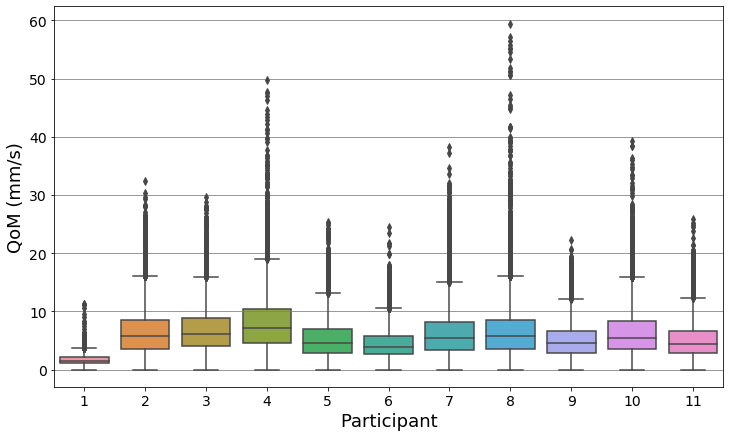

In [67]:
#Box plot of QoM

figbox, axbox = plt.subplots(figsize=(12,7))
qombox = seaborn.boxplot(ax=axbox, data=vels_group[8], width=0.8) #QoM box plot for Group 8
axbox.set_facecolor("white")
axbox.yaxis.grid(color='gray')
qombox.set_xlabel("Participant",fontsize=18)
qombox.set_ylabel("QoM (mm/s)",fontsize=18)
qombox.tick_params(labelsize=14)

### Smoothing velocity
Calculating the envelope of the velocity using a rolling average

In [45]:
#Smoothing the velocity profile for all participants (envelope)
velenv = {}    
velenvx = {}
velenvy = {}
velenvz = {}

for groups in range(1,num_groups+1):
    velenv[groups] = {}
    velenvx[groups] = {}
    velenvy[groups] = {}
    velenvz[groups] = {}
    
    
    for i in range(1,len(nm12[groups])+1):
        velenv[groups][i] = vels_group[groups][i].rolling(200,center=True,win_type='boxcar',min_periods=1).mean()
        
        velenvx[groups][i] = velsx_group[groups][i].rolling(200,center=True,win_type='boxcar',min_periods=1).mean()
        velenvy[groups][i] = velsy_group[groups][i].rolling(200,center=True,win_type='boxcar',min_periods=1).mean()
        velenvz[groups][i] = velsz_group[groups][i].rolling(200,center=True,win_type='boxcar',min_periods=1).mean()

In [46]:
#Concatenating smoothed velocity for all participants in each group
vel_env_group = {}
vel_envx_group = {}
vel_envy_group = {}
vel_envz_group = {}

for group_id in range(1,num_groups+1):
    vel_env_group[group_id] = pd.concat(velenv[group_id],1)
    
    vel_envx_group[group_id] = pd.concat(velenvx[group_id],1)
    vel_envy_group[group_id] = pd.concat(velenvy[group_id],1)
    vel_envz_group[group_id] = pd.concat(velenvz[group_id],1)

In [47]:
vel_envx_group[1] #smoothed velocities group 1

,1,2,3,4,5,6,7,8,9
Time (s),,,,,,,,,
0.010000,1.457960,1.702953,2.188939,2.978917,2.330935,3.763895,1.842949,3.640899,3.157912
0.020001,1.449465,1.713814,2.178157,2.984076,2.323698,3.761282,1.896977,3.632572,3.164269
0.030001,1.449960,1.735246,2.172489,2.968545,2.366601,3.751857,1.915633,3.644016,3.162657
0.040001,1.439766,1.756262,2.174697,2.946520,2.385371,3.750381,1.940723,3.645530,3.163990
0.050001,1.432653,1.770143,2.193208,2.952803,2.417241,3.738358,1.953792,3.629707,3.166258
...,...,...,...,...,...,...,...,...,...
359.969999,1.656144,5.184618,2.381839,2.520882,2.625641,3.868464,1.428532,3.663708,3.257052
359.979999,1.635531,5.158511,2.375896,2.485508,2.618197,3.820086,1.439383,3.643168,3.278755
359.989999,1.636848,5.145488,2.381487,2.497018,2.635849,3.785332,1.450445,3.620288,3.304763


Text(0.5, 1.0, 'Velocity (QoM) participant 8_2')

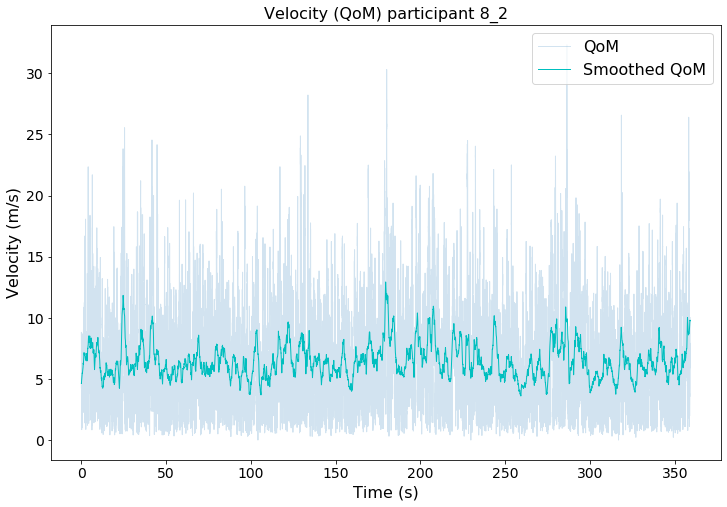

In [48]:
# Raw and smooth velocity plot for one participant

fig, ax = plt.subplots(1)
fig.set_figheight(8)
fig.set_figwidth(12)
ax.set_facecolor("white")
ax.plot(vels_group[8][2], lw=1, label='QoM', alpha=0.2)
ax.plot(velenv[8][2], lw=1, label='Smoothed QoM', color='c')
plt.tick_params(axis='both', which='major', labelsize=14)
ax.legend(loc='upper right', fontsize=16)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('Velocity (m/s)', fontsize=16);
plt.title('Velocity (QoM) participant 8_2', fontsize=16)

Text(0.5, 1.0, 'Velocities from all participants and reference markers in Group 8')

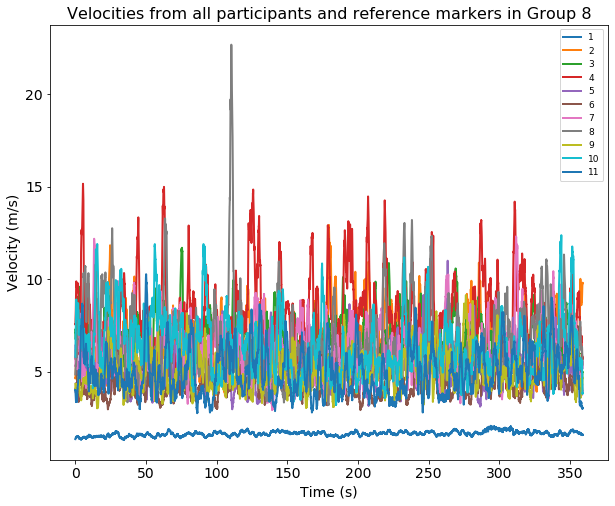

In [49]:
#Plotting all smoothed velocities for one group
ax1 = vel_env_group[8].plot(figsize=(10,8), linewidth=2, fontsize=14)
ax1.set_facecolor("white")
plt.xlabel('Time (s)', fontsize=14);
plt.ylabel('Velocity (m/s)', fontsize=14);
plt.legend(loc='upper right', fontsize=9)
plt.title('Velocities from all participants and reference markers in Group 8', fontsize=16)

### Mean of Norm of the Velocity (mean QoM)

In [50]:
#Mean of velocities

for groups in range(1,num_groups+1):
    
    for i in range(1,len(nm12[groups])+1):
        velocities[groups][i].loc['mean'] = velocities[groups][i].mean()

## Segmenting data by conditions and stimuli
Presentation of stimuli was fixed for all groups. All sessions started with 3min of silence followed by 3min of music.

### Segmenting group data based on the order and duration of stimuli

In [51]:
def segments(data):
    #First segment was always Silence - 180s
    #After that:
    #1 - Lento (#3) from György Ligeti’s Ten Pieces for Wind Quintet (20s)
    #2 - Allegro con delicatezza (#8) from György Ligeti’s Ten Pieces for Wind Quintet (15s)
    #3 - Adagio from Joaquin Rodrigo's Concierto de Aranjuez (40s)
    #4 - Winter movement from Vivaldi's The Four Seasons (20s)
    #5 - Left & Right by D'Angelo, featuring Method Man & Redman (35s)
    #6 - Salsa (20s)
    #7 - EDM (30s)
    
    #Total duration of recording 360s
          
    segments = {}
    
    segments[0]= data.iloc[0:18000]
    segments[1]= data.iloc[18000:20000]
    segments[2]= data.iloc[20000:21500]
    segments[3]= data.iloc[21500:25500]
    segments[4]= data.iloc[25500:27500]
    segments[5]= data.iloc[27500:31000]
    segments[6]= data.iloc[31000:33000]
    segments[7]= data.iloc[33000:36000]
    
    
    return segments

### Segmenting raw and smoothed Velocity (QoM)

In [52]:
QoM_segmented = {}
QoMX_segmented = {}
QoMY_segmented = {}
QoMZ_segmented = {}

for group_id in range(1,num_groups+1):
    QoM_segmented[group_id] = segments(vels_group[group_id])
    QoMX_segmented[group_id] = segments(velsx_group[group_id])
    QoMY_segmented[group_id] = segments(velsy_group[group_id])
    QoMZ_segmented[group_id] = segments(velsz_group[group_id])
    
QoM_smooth_segmented = {}
QoMX_smooth_segmented = {}
QoMY_smooth_segmented = {}
QoMZ_smooth_segmented = {}

for group_id in range(1,num_groups+1):
    QoM_smooth_segmented[group_id] = segments(vel_env_group[group_id])
    QoMX_smooth_segmented[group_id] = segments(vel_envx_group[group_id])
    QoMY_smooth_segmented[group_id] = segments(vel_envy_group[group_id])
    QoMZ_smooth_segmented[group_id] = segments(vel_envz_group[group_id])

In [53]:
QoM_segmented[8][0] #Displaying QoM data for group 8, segment 0 (silence)

,1,2,3,4,5,6,7,8,9,10,11
Time (s),,,,,,,,,,,
0.010000,0.424252,4.273053,1.987405,4.571524,2.690650,10.190889,5.481635,0.781003,7.034717,1.378366,10.481120
0.020001,0.616424,5.033745,3.179534,4.327696,1.268822,9.128272,5.738307,2.172496,6.544281,1.187401,10.802477
0.030001,2.004938,8.810543,4.170016,3.981095,2.774810,10.428995,6.747404,2.599928,6.745181,1.252962,9.159439
0.040001,1.356428,4.438345,5.511652,5.241037,1.702891,8.314214,3.449542,2.509910,6.515952,3.602676,8.675011
0.050001,1.319054,6.006496,6.008992,2.994912,5.158344,8.060793,2.513891,1.396385,7.812592,4.342689,8.440144
...,...,...,...,...,...,...,...,...,...,...,...
179.965013,1.004960,27.012948,4.318444,5.293245,1.667287,2.027257,4.509863,0.812381,3.270994,2.688791,9.056789
179.975013,0.927336,26.521705,2.336599,5.835932,4.160413,2.410327,3.283200,0.899975,4.318444,0.670802,6.297443
179.985013,0.781003,27.876275,2.865230,6.815234,2.819496,3.979839,2.256040,4.138725,5.076275,2.662631,8.854695


### Grouping data into silence and music segments

In [54]:
#Odd segments are silence, even segments are music
QoM_segmented_mus = {} #creating empty dictionaries for data during music - raw
QoMX_segmented_mus = {}
QoMY_segmented_mus = {}
QoMZ_segmented_mus = {}

QoM_segmented_sil = {} #creating empty dictionaries for data during silence - raw
QoMX_segmented_sil = {}
QoMY_segmented_sil = {}
QoMZ_segmented_sil = {}

QoM_smooth_segmented_mus = {} #creating empty dictionaries for data during music - smooth
QoMX_smooth_segmented_mus = {}
QoMY_smooth_segmented_mus = {}
QoMZ_smooth_segmented_mus = {}

QoM_smooth_segmented_sil = {}  #creating empty dictionaries for data during silence - smooth
QoMX_smooth_segmented_sil = {}
QoMY_smooth_segmented_sil = {}
QoMZ_smooth_segmented_sil = {}

for group_id in range(1,num_groups+1):
  QoM_segmented_mus[group_id] = {} 
  QoMX_segmented_mus[group_id] = {}
  QoMY_segmented_mus[group_id] = {}
  QoMZ_segmented_mus[group_id] = {}
  
  QoM_segmented_sil[group_id] = {}  
  QoMX_segmented_sil[group_id] = {}
  QoMY_segmented_sil[group_id] = {}
  QoMZ_segmented_sil[group_id] = {}
  
  QoM_smooth_segmented_mus[group_id] = {}  
  QoMX_smooth_segmented_mus[group_id] = {}
  QoMY_smooth_segmented_mus[group_id] = {}
  QoMZ_smooth_segmented_mus[group_id] = {}
  
  QoM_smooth_segmented_sil[group_id] = {}   
  QoMX_smooth_segmented_sil[group_id] = {}
  QoMY_smooth_segmented_sil[group_id] = {}
  QoMZ_smooth_segmented_sil[group_id] = {}
  

  QoM_segmented_sil[group_id] = QoM_segmented[group_id][0] #filling a dictionary with silence
  QoM_smooth_segmented_sil[group_id] = QoM_smooth_segmented[group_id][0]  
  QoMX_segmented_sil[group_id] = QoMX_segmented[group_id][0]  
  QoMX_smooth_segmented_sil[group_id] = QoMX_smooth_segmented[group_id][0]
  QoMY_segmented_sil[group_id] = QoMY_segmented[group_id][0] 
  QoMY_smooth_segmented_sil[group_id] = QoMY_smooth_segmented[group_id][0]
  QoMZ_segmented_sil[group_id] = QoMZ_segmented[group_id][0] 
  QoMZ_smooth_segmented_sil[group_id] = QoMZ_smooth_segmented[group_id][0]
    
    
    
  for i in range (1,8,1):  
    QoM_smooth_segmented_mus[group_id][i] = QoM_smooth_segmented[group_id][i] #filling dictionary with music segments
    QoM_segmented_mus[group_id][i] = QoM_segmented[group_id][i]     
    QoMX_smooth_segmented_mus[group_id][i] = QoMX_smooth_segmented[group_id][i]
    QoMX_segmented_mus[group_id][i] = QoMX_segmented[group_id][i] 
    QoMY_smooth_segmented_mus[group_id][i] = QoMY_smooth_segmented[group_id][i]
    QoMY_segmented_mus[group_id][i] = QoMY_segmented[group_id][i] 
    QoMZ_smooth_segmented_mus[group_id][i] = QoMZ_smooth_segmented[group_id][i]
    QoMZ_segmented_mus[group_id][i] = QoMZ_segmented[group_id][i] 

    
    

In [55]:
QoM_smooth_segmented_mus[2][1] #Smoothed QoM, Group2, first music segment - Ligeti

,1,2,3,4,5,6,7,8,9,10,11
Time (s),,,,,,,,,,,
180.015056,0.0,6.937099,4.574055,11.103825,6.075772,6.807439,6.092713,8.636179,7.462856,5.171393,7.431872
180.025057,0.0,6.925264,4.581457,11.124003,6.059762,6.793471,6.087421,8.621769,7.411875,5.148101,7.376520
180.035057,0.0,6.922439,4.594603,11.150834,6.045212,6.779798,6.075023,8.619769,7.378712,5.122368,7.309360
180.045057,0.0,6.920625,4.578530,11.159549,6.031319,6.755274,6.079760,8.620091,7.332232,5.086474,7.260781
180.055058,0.0,6.943549,4.582446,11.165902,6.025888,6.747783,6.079466,8.634413,7.287306,5.043647,7.192199
...,...,...,...,...,...,...,...,...,...,...,...
199.965617,0.0,5.825088,5.873880,5.064393,3.482565,7.701356,4.466349,6.732666,6.818291,5.172204,6.916185
199.975617,0.0,5.836405,5.850410,5.027943,3.504037,7.711324,4.491316,6.754894,6.838588,5.131561,6.887739
199.985617,0.0,5.828795,5.832377,4.995787,3.521016,7.728866,4.516939,6.789174,6.854257,5.097447,6.857994


### Mean QoM for each segment for each participant

In [56]:
# Mean QoM for each participant in each group for each segment

Mean_QoM_segm = {}    

for qoms_group in range(1,num_groups+1):
    Mean_QoM_segm[qoms_group] = {}
    
    for i in range(0,len(QoM_segmented[qoms_group])):
       Mean_QoM_segm[qoms_group][i] = (QoM_segmented[qoms_group][i].mean())
       

In [57]:
Mean_QoM_segm[1][0] #Displaying mean QoM for participants in group 1, segment 0 (Silence)

1     2.086325
2     8.136296
3    11.181882
4     6.478199
5     5.578051
6     5.293612
7     6.394808
8     7.072496
9     7.009064
dtype: float64

## Plotting segmented QoM

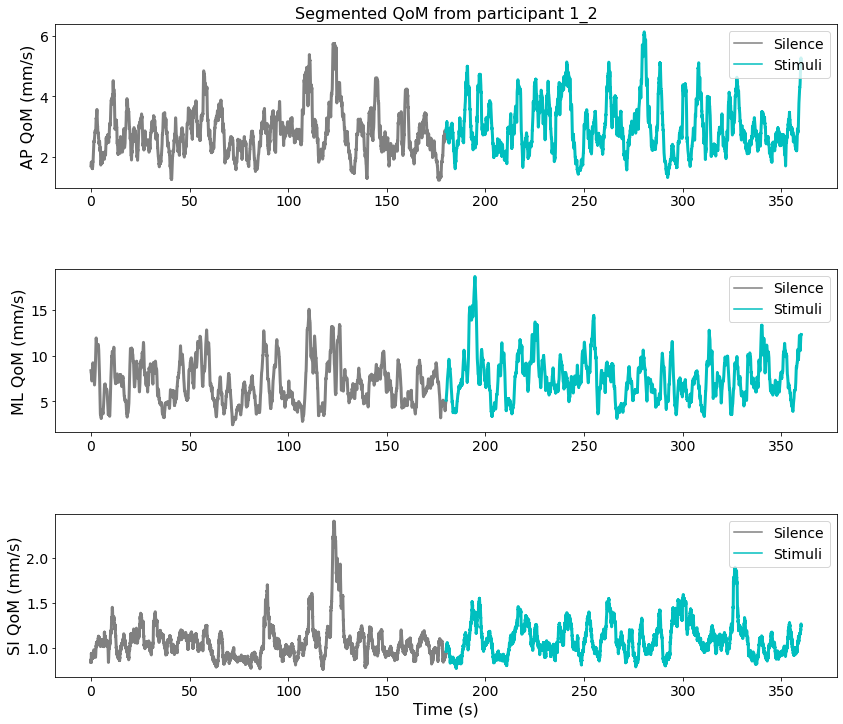

In [58]:
#Plotting segmented QoM in the three directions with color-coded conditions for one participant
f = plt.figure(figsize=(14,12))
hfont = {'fontname':'Helvetica'}

axX = plt.subplot(3, 1, 1)
axX.set_facecolor("white")

plt.title('Segmented QoM from participant 1_2', fontsize=16)


axX.plot(QoMX_smooth_segmented_sil[1][2], 'gray', lw=3, label='_nolegend_') #plotting silence segment participant 1_2
for j in range(1,8):
  axX.plot(QoMX_smooth_segmented_mus[1][j][2], 'c', lw=3, label='_nolegend_') #plotting music segments participant 1_2


  
plt.plot([], label="Silence", color='gray')  
plt.plot([], label="Stimuli", color='c')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('AP QoM (mm/s)', fontsize=16);
plt.legend(loc='upper right', fontsize=14)


axZ = plt.subplot(3, 1, 2)
axZ.set_facecolor("white")

axZ.plot(QoMY_smooth_segmented_sil[1][2], 'gray', lw=3, label='_nolegend_') #plotting silence segment participant 1_2
for j in range(1,8):
  axZ.plot(QoMY_smooth_segmented_mus[1][j][2], 'c', lw=3, label='_nolegend_') #plotting music segments participant 1_2


plt.plot([], label="Silence", color='gray')  
plt.plot([], label="Stimuli", color='c')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('ML QoM (mm/s)', fontsize=16);
plt.legend(loc='upper right', fontsize=14)


axY = plt.subplot(3, 1, 3)
axY.set_facecolor("white")

axY.plot(QoMZ_smooth_segmented_sil[1][2], 'gray', lw=3, label='_nolegend_') #plotting silence segment participant 1_2
for j in range(1,8):
  axY.plot(QoMZ_smooth_segmented_mus[1][j][2], 'c', lw=3, label='_nolegend_') #plotting music segments participant 1_2
  
plt.plot([], label="Silence", color='gray')  
plt.plot([], label="Stimuli", color='c')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('SI QoM (mm/s)', fontsize=16);
plt.legend(loc='upper right', fontsize=14)

plt.subplots_adjust(hspace=0.5)



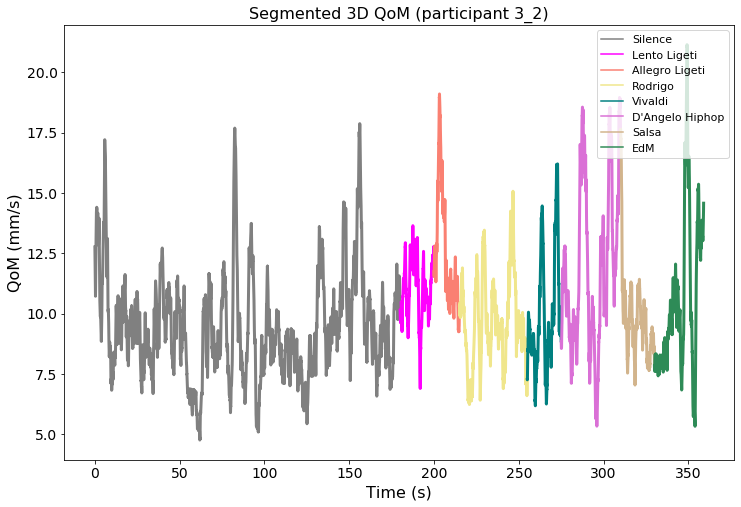

In [59]:
#Plotting segmented QoM (norm) with color-coded stimuli for one participant

fig8, ax8 = plt.subplots(1)
fig8.set_figheight(8)
fig8.set_figwidth(12)
ax8.set_facecolor("white")

ax8.plot(QoM_smooth_segmented_sil[4][2], 'gray', lw=3, label='_nolegend_') #plotting silence segments

ax8.plot(QoM_smooth_segmented_mus[4][1][2], 'magenta', lw=3, label='_nolegend_') #plotting  stimuli1
ax8.plot(QoM_smooth_segmented_mus[4][2][2], 'salmon', lw=3, label='_nolegend_') #plotting stimuli2
ax8.plot(QoM_smooth_segmented_mus[4][3][2], 'khaki', lw=3, label='_nolegend_') #plotting stimuli3
ax8.plot(QoM_smooth_segmented_mus[4][4][2], 'teal', lw=3, label='_nolegend_') #plotting stimuli4
ax8.plot(QoM_smooth_segmented_mus[4][5][2], 'orchid', lw=3, label='_nolegend_') #plotting stimuli5
ax8.plot(QoM_smooth_segmented_mus[4][6][2], 'tan', lw=3, label='_nolegend_') #plotting stimuli6
ax8.plot(QoM_smooth_segmented_mus[4][7][2], 'seagreen', lw=3, label='_nolegend_') #plotting stimuli7


plt.plot([], label="Silence", color='gray')

plt.plot([], label="Lento Ligeti", color='magenta')
plt.plot([], label="Allegro Ligeti", color='salmon')
plt.plot([], label="Rodrigo", color='khaki')
plt.plot([], label="Vivaldi", color='teal')
plt.plot([], label="D'Angelo Hiphop", color='orchid')
plt.plot([], label="Salsa", color='tan')
plt.plot([], label="EdM", color='seagreen')

    #1 - Lento (#3) from György Ligeti’s Ten Pieces for Wind Quintet (20s)
    #2 - Allegro con delicatezza (#8) from György Ligeti’s Ten Pieces for Wind Quintet (15s)
    #3 - Adagio from Joaquin Rodrigo's Concierto de Aranjuez (40s)
    #4 - Winter movement from Vivaldi's The Four Seasons (20s)
    #5 - Left & Right by D'Angelo, featuring Method Man & Redman (35s)
    #6 - Salsa (20s)
    #7 - EDM (30s)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('QoM (mm/s)', fontsize=16);
plt.title('Segmented 3D QoM (participant 3_2)', fontsize=16)
plt.legend(loc='upper right', fontsize=11)

## Visualizing the stimuli

(-1, 1)

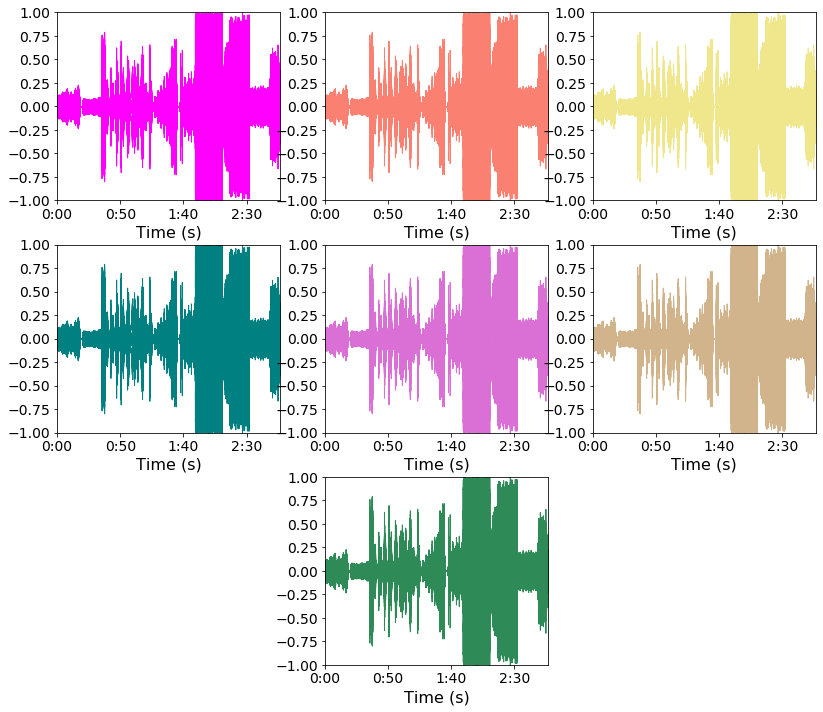

In [63]:
#Plotting segmented QoM (norm) with color-coded stimuli for one participant AND stimuli waveforms

#Loading stimuli files with librosa

y1, sr1 = librosa.load(r'\Users\bwils\OneDrive\Documents\GitHub\Capstone-2--MicroMotion\Source_Data\Micro_Motion_2012\sound_data\nm12stimuli.wav')
y2, sr2 = librosa.load(r'\Users\bwils\OneDrive\Documents\GitHub\Capstone-2--MicroMotion\Source_Data\Micro_Motion_2012\sound_data\nm12stimuli.wav')
y3, sr3 = librosa.load(r'\Users\bwils\OneDrive\Documents\GitHub\Capstone-2--MicroMotion\Source_Data\Micro_Motion_2012\sound_data\nm12stimuli.wav')
y4, sr4 = librosa.load(r'\Users\bwils\OneDrive\Documents\GitHub\Capstone-2--MicroMotion\Source_Data\Micro_Motion_2012\sound_data\nm12stimuli.wav')
y5, sr5 = librosa.load(r'\Users\bwils\OneDrive\Documents\GitHub\Capstone-2--MicroMotion\Source_Data\Micro_Motion_2012\sound_data\nm12stimuli.wav')
y6, sr6 = librosa.load(r'\Users\bwils\OneDrive\Documents\GitHub\Capstone-2--MicroMotion\Source_Data\Micro_Motion_2012\sound_data\nm12stimuli.wav')
y7, sr7 = librosa.load(r'\Users\bwils\OneDrive\Documents\GitHub\Capstone-2--MicroMotion\Source_Data\Micro_Motion_2012\sound_data\nm12stimuli.wav')



fig = plt.figure(figsize=(16,12))
grid = plt.GridSpec(20, 7, wspace=0.5, hspace=0.5)


plt.subplot(grid[0:6,0:2])
librosa.display.waveplot(y1, sr=sr1, color='magenta')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))


plt.subplot(grid[0:6,2:4])
librosa.display.waveplot(y2, sr=sr2, color='salmon')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))


plt.subplot(grid[0:6,4:6])
librosa.display.waveplot(y3, sr=sr3, color='khaki')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))

plt.subplot(grid[7:13,0:2])
librosa.display.waveplot(y4, sr=sr4, color='teal')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))

plt.subplot(grid[7:13,2:4])
librosa.display.waveplot(y5, sr=sr5, color='orchid')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))

plt.subplot(grid[7:13,4:6])
librosa.display.waveplot(y6, sr=sr6, color='tan')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))

plt.subplot(grid[14:20,2:4])
librosa.display.waveplot(y7, sr=sr7, color='seagreen')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))


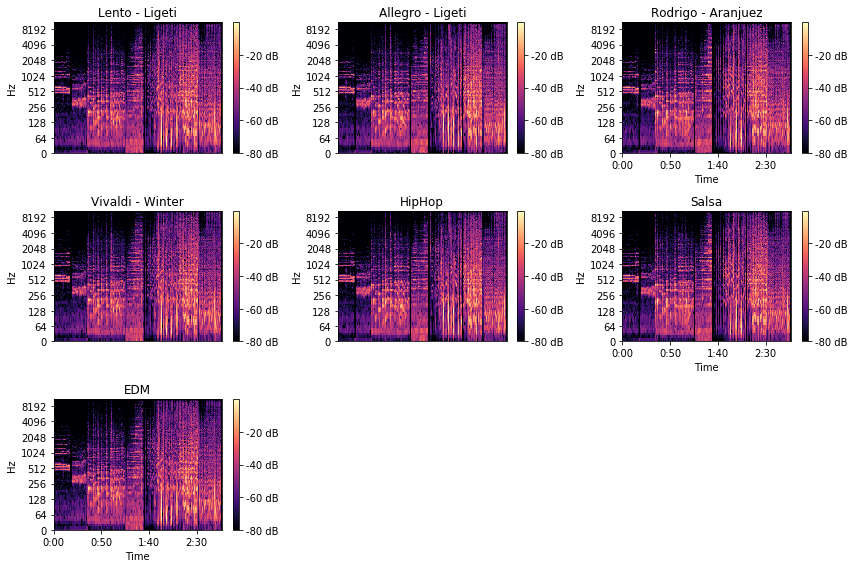

In [64]:
#Generating spectrograms for all stimuli

D1 = librosa.amplitude_to_db(np.abs(librosa.stft(y1)), ref=np.max)
D2 = librosa.amplitude_to_db(np.abs(librosa.stft(y2)), ref=np.max)
D3 = librosa.amplitude_to_db(np.abs(librosa.stft(y3)), ref=np.max)
D4 = librosa.amplitude_to_db(np.abs(librosa.stft(y4)), ref=np.max)
D5 = librosa.amplitude_to_db(np.abs(librosa.stft(y5)), ref=np.max)
D6 = librosa.amplitude_to_db(np.abs(librosa.stft(y6)), ref=np.max)
D7 = librosa.amplitude_to_db(np.abs(librosa.stft(y7)), ref=np.max)


fig = plt.figure(figsize=(12,8))

plt.subplot(3, 3, 1)
librosa.display.specshow(D1, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Lento - Ligeti')

plt.subplot(3, 3, 2)
librosa.display.specshow(D2, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Allegro - Ligeti')

plt.subplot(3, 3, 3)
librosa.display.specshow(D3, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Rodrigo - Aranjuez')

plt.subplot(3, 3, 4)
librosa.display.specshow(D4, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Vivaldi - Winter')

plt.subplot(3, 3, 5)
librosa.display.specshow(D5, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('HipHop')

plt.subplot(3, 3, 6)
librosa.display.specshow(D6, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Salsa')

plt.subplot(3, 3, 7)
librosa.display.specshow(D7, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('EDM')


plt.tight_layout()

fig.savefig("spectrograms_stimuli.pdf", bbox_inches='tight')
